<a href="https://colab.research.google.com/github/bhupii77/uber-driver---life-time-value/blob/main/uber_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for advanced data visualization

In [ ]:
# Read all datasets
# Read the driver_ids.csv file and store the data in a pandas DataFrame called driver_ids.
driver_ids = pd.read_csv('/content/driver_ids.csv')

# Read the ride_timestamps.csv file and store the data in a pandas DataFrame called ride_timestamps.
ride_timestamps = pd.read_csv('/content/ride_timestamps.csv')

# Read the ride_ids.csv file and store the data in a pandas DataFrame called ride_ids.
ride_ids = pd.read_csv('/content/ride_ids.csv')

In [ ]:
# print sample of driver_ids data
driver_ids.sample(2)

driver_id  driver_onboard_date
597  9d59581a50c97cf28d30f80cc77dd76c  2016-03-30 00:00:00
9    028b5a4dcd7f4924ebfabcf2e814c014  2016-05-06 00:00:00

In [ ]:
# Some info about driver_ids data

# Print shape (num. of rows, num. of columns)
print('Shape of data: ', driver_ids.shape)
# Print unique of driver id
print('unique of driver id: ', len(driver_ids['driver_id'].unique()) )
# Print Minimum and Maximum value of driver onboard date
print('Minimum date: ',driver_ids['driver_onboard_date'].min())
print('Maximum date: ',driver_ids['driver_onboard_date'].max())

Shape of data:  (937, 2)
unique of driver id:  937
Minimum date:  2016-03-28 00:00:00
Maximum date:  2016-05-15 00:00:00


In [ ]:
# print sample of ride_timestamps data
ride_timestamps.sample(2)

ride_id         event            timestamp
57685   0f5851a86c7fa8bc9be700c9b88cb833  requested_at  2016-05-16 20:46:36
157942  29bdfac6396f00c58e910badb51ca7e4    arrived_at  2016-06-16 17:57:41

In [ ]:
# Some info about ride_timestamps data

# Print shape (num. of rows, num. of columns)
print('Shape of data: ', ride_timestamps.shape)
# Print unique count of ride id
print('unique of ride id: ', len(ride_timestamps['ride_id'].unique()))
# Print count of every value in column Event
ride_timestamps['event'].value_counts()

Shape of data:  (286845, 3)
unique of ride id:  57370


requested_at      57369
accepted_at       57369
arrived_at        57369
picked_up_at      57369
dropped_off_at    57368
Name: event, dtype: int64

In [ ]:
# print sample of ride_ids data
ride_ids.sample(2)


driver_id                           ride_id  \
4615    06c848ab3a7fc5421e82e98850a81710  359ad8c4b378f4ac4f883c9648e68971   
116895  93337ec6e89c26ff280f490dc3eb9042  bc3b402ff72411861b62910b3695e3c1   

        ride_distance  ride_duration  ride_prime_time  
4615             1186            294                0  
116895           3318            825              100

In [ ]:
# Some info about ride_ids data

# Print shape (num. of rows, num. of columns)
print('Shape of data: ', ride_ids.shape)
# Print count unique values of driver id
print('unique of driver id: ', len(ride_ids['driver_id'].unique()))
# Print count unique values of ride id
print('unique of ride id: ', len(ride_ids['ride_id'].unique()))
# Description of numeric columns (ride_distance, ride_duration, ride_prime_time)
ride_ids.describe()

Shape of data:  (193502, 5)
unique of driver id:  937
unique of ride id:  193502


ride_distance  ride_duration  ride_prime_time
count  193502.000000  193502.000000    193502.000000
mean     6955.218266     858.966099        17.305893
std      8929.444606     571.375818        30.825800
min        -2.000000       2.000000         0.000000
25%      2459.000000     491.000000         0.000000
50%      4015.000000     727.000000         0.000000
75%      7193.000000    1069.000000        25.000000
max    724679.000000   28204.000000       500.000000

**Data Engineering**

**Calculate the Total Cost of Ride**

We calculate the cost per ride using the assumptions from the Uber rate card given:

- Base Fare $2.00

- Cost per Mile $1.15

- Cost per Minute $0.22

- Service Fee $1.75

- Minimum Fare $5.00

- Maximum Fare $400.00

We also apply assumptions regarding applying the Prime Time rate and the Service Fee in line with the actual pricing model of Uber as described in many articles such as this one.

So we calculate it by using this formula:
\begin{align*} \left( \text{base fare}

\text{cost per mile} \times \text{ride_distance}

\text{cost per minute} \times \text{ride_duration} \right) \times \left( 1

\frac{{\text{ride_prime_time}}}{100} \right)

\text{service fee} \end{align*}

After that, we check if there are any costs less than Minimum Fare, or more than Maximum Fare are change them appropriately, to either Minimum or Maximum Fare respectively.

In [ ]:
# constant variables used  to calc. total cost of ride (driver's lifetime value)
BASEFARE = 2.00
COSTPERMILE = 1.15
COSTPERMIN = 0.22
SERVICEFEE = 1.75
MINFARE = 5.00
MAXFARE = 400.00
# calc. total life time of ride (convert ride_distance from meters to miles, convert ride_duration from seconds to minutes)
ride_ids['ride_total_cost'] = ( (BASEFARE + (COSTPERMIN*(ride_ids['ride_duration']/60)) + (COSTPERMILE*(ride_ids['ride_distance']*0.000621))) * (1 + ride_ids['ride_prime_time']/100) ) + SERVICEFEE

# Apply lower and upper bound to ride cost (Minimum Fare, Maximum Fare )
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] < MINFARE, MINFARE, ride_ids['ride_total_cost'])
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] > MAXFARE, MAXFARE, ride_ids['ride_total_cost'])
# print first 3 rows in dataframe
ride_ids.head(3)

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   

   ride_distance  ride_duration  ride_prime_time  ride_total_cost  
0           1811            327               50         8.488488  
1           3362            809                0         9.117306  
2           3282            572                0         8.191174

Create Features of the Rides

In [ ]:
# Pivot the ride events
ride_events = ride_timestamps.pivot(index = 'ride_id', columns = 'event', values = 'timestamp')
ride_events.head(3)

event                             NaN          accepted_at  \
ride_id                                                      
00003037a262d9ee40e61b5c0718f7f0  NaN  2016-06-13 09:39:51   
00005eae40882760d675da5effb89ae3  NaN  2016-05-14 05:23:25   
000061d42cf29f73b591041d9a1b2973  NaN  2016-05-16 15:43:14   

event                                      arrived_at       dropped_off_at  \
ride_id                                                                      
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 09:44:31  2016-06-13 10:03:05   
00005eae40882760d675da5effb89ae3  2016-05-14 05:26:17  2016-05-14 05:34:17   
000061d42cf29f73b591041d9a1b2973  2016-05-16 15:47:29  2016-05-16 15:54:18   

event                                    picked_up_at         requested_at  
ride_id                                                                     
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 09:44:33  2016-06-13 09:39:19  
00005eae40882760d675da5effb89ae3  2016-05-14 05:26:18  2016-05-14 05:23:21  
000061d42cf29f73b591041d9a1b2973  2016-05-16 15:47:32  2016-05-16 15:43:09

In [ ]:
# Merge ride_ids data with ride events on ride_id
ride_data = pd.merge(ride_ids, ride_events, on='ride_id')
print('Shape of Ride data :', ride_data.shape)
ride_data.head(3)


Shape of Ride data : (54615, 12)


driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   

   ride_distance  ride_duration  ride_prime_time  ride_total_cost  NaN  \
0           1811            327               50         8.488488  NaN   
1           3362            809                0         9.117306  NaN   
2           3282            572                0         8.191174  NaN   

           accepted_at           arrived_at       dropped_off_at  \
0  2016-04-23 02:14:15  2016-04-23 02:16:36  2016-04-23 02:22:07   
1  2016-03-29 19:00:52  2016-03-29 19:03:57  2016-03-29 19:17:30   
2  2016-06-21 11:56:39  2016-06-21 12:01:32  2016-06-21 12:11:07   

          picked_up_at         requested_at  
0  2016-04-23 02:16:40  2016-04-23 02:13:50  
1  2016-03-29 19:04:01  2016-03-29 19:00:49  
2  2016-06-21 12:01:35  2016-06-21 11:56:31

In [ ]:
# Info about ride_data
ride_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54615 entries, 0 to 54614
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   driver_id        54615 non-null  object 
 1   ride_id          54615 non-null  object 
 2   ride_distance    54615 non-null  int64  
 3   ride_duration    54615 non-null  int64  
 4   ride_prime_time  54615 non-null  int64  
 5   ride_total_cost  54615 non-null  float64
 6   nan              0 non-null      object 
 7   accepted_at      54615 non-null  object 
 8   arrived_at       54615 non-null  object 
 9   dropped_off_at   54614 non-null  object 
 10  picked_up_at     54615 non-null  object 
 11  requested_at     54615 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 5.4+ MB


In [ ]:
# convert ride distance from meters to kilometers
ride_data["ride_distance"] = ride_data["ride_distance"]/1000
# convert ride duration from seconds to minutes
ride_data["ride_duration"] = ride_data["ride_duration"]/60

# Create some Features
# It is the time a driver takes to accept a ride once it is requested in minutes.
ride_data['ride_accept_response_time'] = (pd.to_datetime(ride_data['accepted_at']) - pd.to_datetime(ride_data['requested_at'])).astype('timedelta64[s]')/60
# It is the time a driver takes to reach the pickup location once a ride is accepted in minutes.
ride_data['ride_arrival_time'] = (pd.to_datetime(ride_data['arrived_at']) - pd.to_datetime(ride_data['accepted_at'])).astype('timedelta64[s]')/60
# It is the time a driver waits for the rider once the driver reaches the pickup location in minutes.
ride_data['ride_wait_time'] = (pd.to_datetime(ride_data['picked_up_at']) - pd.to_datetime(ride_data['arrived_at'])).astype('timedelta64[s]')/60
# divide ride distance to 3 categories (Short ride, medium ride, long ride) dependant on ride_distance column (KM)
ride_data["ride_length"] = np.where(ride_data["ride_distance"] > ride_data['ride_distance'].quantile(0.33), (np.where(ride_data["ride_distance"] < ride_data['ride_distance'].quantile(0.66), "med_ride", "long_ride")), "short_ride")
# divide ride time to 3 categories (Morning ride, evening ride, night ride) dependant on accepted_at column (time)
ride_data["ride_time"] = np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour > 6, (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 15, "morning_ride", (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 21, "evening_ride", "night_ride")))), "night_ride")
# Convert accepted_at column to date
ride_data['ride_date'] = pd.to_datetime(ride_data['accepted_at']).dt.date
# Print first 3 rows in ride data
ride_data.head(3)

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   

   ride_distance  ride_duration  ride_prime_time  ride_total_cost  NaN  \
0          1.811       5.450000               50         8.488488  NaN   
1          3.362      13.483333                0         9.117306  NaN   
2          3.282       9.533333                0         8.191174  NaN   

           accepted_at           arrived_at       dropped_off_at  \
0  2016-04-23 02:14:15  2016-04-23 02:16:36  2016-04-23 02:22:07   
1  2016-03-29 19:00:52  2016-03-29 19:03:57  2016-03-29 19:17:30   
2  2016-06-21 11:56:39  2016-06-21 12:01:32  2016-06-21 12:11:07   

          picked_up_at         requested_at  ride_accept_response_time  \
0  2016-04-23 02:16:40  2016-04-23 02:13:50                   0.416667   
1  2016-03-29 19:04:01  2016-03-29 19:00:49                   0.050000   
2  2016-06-21 12:01:35  2016-06-21 11:56:31                   0.133333   

   ride_arrival_time  ride_wait_time ride_length     ride_time   ride_date  
0           2.350000        0.066667  short_ride    night_ride  2016-04-23  
1           3.083333        0.066667    med_ride  evening_ride  2016-03-29  
2           4.883333        0.050000    med_ride  morning_ride  2016-06-21

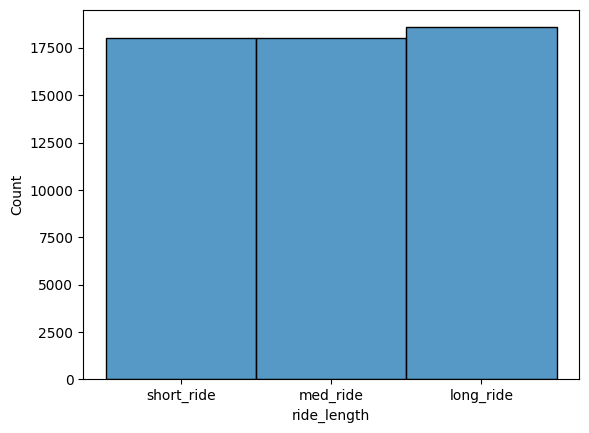

In [ ]:
# histogram of ride length categories
sns.histplot(ride_data["ride_length"])
plt.show()


Create Features of the Drivers

In [ ]:
# calculate driver_perday_ridecount
driver_perday_ridecount = ride_data.pivot_table(index = 'driver_id', columns = 'ride_date', aggfunc='size').fillna(0)
driver_perday_ridecount.head(3)


ride_date                         2016-03-28  2016-03-29  2016-03-30  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         0.0         1.0         0.0   
007f0389f9c7b03ef97098422f902e62         0.0         1.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   

ride_date                         2016-03-31  2016-04-01  2016-04-02  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         3.0         2.0         1.0   
007f0389f9c7b03ef97098422f902e62         0.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   

ride_date                         2016-04-03  2016-04-04  2016-04-05  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         0.0         0.0         2.0   
007f0389f9c7b03ef97098422f902e62         0.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   

ride_date                         2016-04-06  ...  2016-06-17  2016-06-18  \
driver_id                                     ...                           
002be0ffdc997bd5c50703158b7c2491         0.0  ...         0.0         1.0   
007f0389f9c7b03ef97098422f902e62         0.0  ...         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         1.0  ...         0.0         0.0   

ride_date                         2016-06-19  2016-06-20  2016-06-21  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         0.0         0.0         5.0   
007f0389f9c7b03ef97098422f902e62         0.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   

ride_date                         2016-06-22  2016-06-23  2016-06-24  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491         1.0         3.0         0.0   
007f0389f9c7b03ef97098422f902e62         0.0         0.0         0.0   
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0         0.0   

ride_date                         2016-06-25  2016-06-26  
driver_id                                                 
002be0ffdc997bd5c50703158b7c2491         0.0         0.0  
007f0389f9c7b03ef97098422f902e62         0.0         0.0  
011e5c5dfc5c2c92501b8b24d47509bc         0.0         0.0  

[3 rows x 91 columns]

In [ ]:
driver_info = pd.DataFrame()
# Calc. driver total ride count
driver_info['total_ride_count'] = ride_data.pivot_table(index=['driver_id'], aggfunc='size')
# Calc. driver total ride distance
driver_info['total_distance']  = ride_ids.groupby('driver_id')['ride_distance'].sum()
# Calc. driver total ride duration
driver_info['total_duration']  = ride_ids.groupby('driver_id')['ride_duration'].sum()
# Calc. driver lifetime value (total revenue)
driver_info['lifetime_value'] = ride_ids.groupby('driver_id')['ride_total_cost'].sum()
# Calc. mean driver count ride per day
driver_info['perday_ridecount_mean'] = driver_perday_ridecount.mean(axis=1)
# Calc. mean of ride accept responce time for every driver
driver_info['accept_response_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_accept_response_time': 'mean'})).iloc[:,0]
# Calc. mean of ride arrival time for every driver
driver_info['arrival_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_arrival_time': 'mean'})).iloc[:,0]
# Calc. mean of ride wait time for every driver
driver_info['wait_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_wait_time': 'mean'})).iloc[:,0]
# count total no. of short/medium/long evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_length', aggfunc='size') ,on='driver_id')
# count total no. of day/night/night evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_time', aggfunc='size') ,on='driver_id')

# fill nan value with 0
driver_info = driver_info.fillna(0).reset_index()
driver_info.head(5)

driver_id  total_ride_count  total_distance  \
0  002be0ffdc997bd5c50703158b7c2491                85         1740287   
1  007f0389f9c7b03ef97098422f902e62                 7          117531   
2  011e5c5dfc5c2c92501b8b24d47509bc                 9          269653   
3  0152a2f305e71d26cc964f8d4411add9                59         1471239   
4  01674381af7edd264113d4e6ed55ecda               124         3123644   

   total_duration  lifetime_value  perday_ridecount_mean  \
0          221238     3560.056648               0.934066   
1           20497      321.434698               0.076923   
2           29205      482.299206               0.098901   
3          174521     2610.189071               0.648352   
4          357443     5379.644866               1.362637   

   accept_response_time_mean  arrival_time_mean  wait_time_mean  long_ride  \
0                   0.135882           3.009608        0.109608       29.0   
1                   0.085714           3.816667        0.054762        1.0   
2                   0.129630           3.064815        0.114815        2.0   
3                   0.154520           3.772316        0.192938       27.0   
4                   0.325403           3.797581        0.137903       48.0   

   med_ride  short_ride  evening_ride  morning_ride  night_ride  
0      33.0        23.0          25.0          33.0        27.0  
1       4.0         2.0           6.0           0.0         1.0  
2       3.0         4.0           7.0           2.0         0.0  
3      22.0        10.0           6.0          23.0        30.0  
4      43.0        33.0           0.0         113.0        11.0

In [ ]:
# Calc how long do the driver typically continue driving with Lyft
onboard_data = pd.merge(ride_data.groupby('driver_id').agg({'accepted_at': max}), driver_ids , on='driver_id')
# Calc. driver_duration the long of how driver continue driving with lyft par days
onboard_data['driver_duration'] = (pd.to_datetime(onboard_data['accepted_at']) - pd.to_datetime(onboard_data['driver_onboard_date'])).astype('timedelta64[D]')
onboard_data = onboard_data[['driver_id', 'driver_duration']]
onboard_data


driver_id  driver_duration
0    002be0ffdc997bd5c50703158b7c2491             86.0
1    007f0389f9c7b03ef97098422f902e62             77.0
2    011e5c5dfc5c2c92501b8b24d47509bc             68.0
3    0152a2f305e71d26cc964f8d4411add9             63.0
4    01674381af7edd264113d4e6ed55ecda             56.0
..                                ...              ...
830  ff419a3476e21e269e340b5f1f05414e             61.0
831  ff714a67ba8c6a108261cd81e3b77f3a             81.0
832  fff482c704d36a1afe8b8978d5486283             32.0
833  fffecccc49436c5389075b13209f0dfa             51.0
834  ffff51a71f2f185ec5e97d59dbcd7a78             53.0

[835 rows x 2 columns]

In [ ]:
driver_info = pd.merge(driver_info, onboard_data, on= 'driver_id' , how='inner')
driver_info

driver_id  total_ride_count  total_distance  \
0    002be0ffdc997bd5c50703158b7c2491                85         1740287   
1    007f0389f9c7b03ef97098422f902e62                 7          117531   
2    011e5c5dfc5c2c92501b8b24d47509bc                 9          269653   
3    0152a2f305e71d26cc964f8d4411add9                59         1471239   
4    01674381af7edd264113d4e6ed55ecda               124         3123644   
..                                ...               ...             ...   
830  ff419a3476e21e269e340b5f1f05414e                65         2002400   
831  ff714a67ba8c6a108261cd81e3b77f3a               156         2834765   
832  fff482c704d36a1afe8b8978d5486283                 9          174394   
833  fffecccc49436c5389075b13209f0dfa               117         2924913   
834  ffff51a71f2f185ec5e97d59dbcd7a78                98         2372018   

     total_duration  lifetime_value  perday_ridecount_mean  \
0            221238     3560.056648               0.934066   
1             20497      321.434698               0.076923   
2             29205      482.299206               0.098901   
3            174521     2610.189071               0.648352   
4            357443     5379.644866               1.362637   
..              ...             ...                    ...   
830          246308     3537.441127               0.714286   
831          442492     6285.948397               1.714286   
832           27693      380.579655               0.098901   
833          353974     6050.600054               1.285714   
834          268641     4579.933147               1.076923   

     accept_response_time_mean  arrival_time_mean  wait_time_mean  long_ride  \
0                     0.135882           3.009608        0.109608       29.0   
1                     0.085714           3.816667        0.054762        1.0   
2                     0.129630           3.064815        0.114815        2.0   
3                     0.154520           3.772316        0.192938       27.0   
4                     0.325403           3.797581        0.137903       48.0   
..                         ...                ...             ...        ...   
830                   0.244615           4.626410        0.127692       21.0   
831                   0.203632           2.846047        0.044338       48.0   
832                   0.503704           3.307407        0.031481        3.0   
833                   0.135613           3.317379        0.195157       39.0   
834                   0.218027           4.270238        0.041327       34.0   

     med_ride  short_ride  evening_ride  morning_ride  night_ride  \
0        33.0        23.0          25.0          33.0        27.0   
1         4.0         2.0           6.0           0.0         1.0   
2         3.0         4.0           7.0           2.0         0.0   
3        22.0        10.0           6.0          23.0        30.0   
4        43.0        33.0           0.0         113.0        11.0   
..        ...         ...           ...           ...         ...   
830      19.0        25.0          15.0          43.0         7.0   
831      55.0        53.0          50.0         102.0         4.0   
832       2.0         4.0           0.0           9.0         0.0   
833      40.0        38.0          33.0          52.0        32.0   
834      33.0        31.0          27.0          11.0        60.0   

     driver_duration  
0               86.0  
1               77.0  
2               68.0  
3               63.0  
4               56.0  
..               ...  
830             61.0  
831             81.0  
832             32.0  
833             51.0  
834             53.0  

[835 rows x 16 columns]

**Exploratory Data Analysis**

In [ ]:
# plot a heatmap of correlations betweem features
sns.heatmap(driver_info.corr())# Get description of data
driver_info.describe()

total_ride_count  total_distance  total_duration  lifetime_value  \
count        835.000000    8.350000e+02      835.000000      835.000000   
mean          65.184431    1.532136e+06   189691.918563     2986.165445   
std           52.987393    1.259262e+06   153919.383182     2414.871347   
min            3.000000    7.596300e+04    12619.000000      198.831874   
25%           14.000000    3.449590e+05    38633.000000      621.765613   
50%           65.000000    1.453506e+06   190202.000000     2965.981145   
75%          100.000000    2.311979e+06   288112.500000     4491.097461   
max          270.000000    6.628201e+06   779797.000000    12347.102999   

       perday_ridecount_mean  accept_response_time_mean  arrival_time_mean  \
count             835.000000                 835.000000         835.000000   
mean                0.716312                   0.193710           4.452441   
std                 0.582279                   0.100319           1.549531   
min                 0.032967                   0.050000           1.394444   
25%                 0.153846                   0.136823           3.402104   
50%                 0.714286                   0.172152           4.060417   
75%                 1.098901                   0.219121           5.065704   
max                 2.967033                   1.116667          13.021667   

       wait_time_mean   long_ride   med_ride  short_ride  evening_ride  \
count      835.000000  835.000000  835.00000  835.000000    835.000000   
mean         0.070376   22.177246   21.51018   21.497006     25.265868   
std          0.125719   18.389138   18.39510   18.782063     24.347380   
min         -1.272917    0.000000    0.00000    0.000000      0.000000   
25%          0.035714    5.000000    4.00000    4.000000      5.000000   
50%          0.057143   20.000000   20.00000   20.000000     18.000000   
75%          0.124053   34.000000   33.00000   33.500000     42.000000   
max          0.694444  105.000000   94.00000  107.000000    117.000000   

       morning_ride  night_ride  driver_duration  
count    835.000000  835.000000       835.000000  
mean      25.244311   14.674251        53.462275  
std       27.618160   19.318155        22.463922  
min        0.000000    0.000000         0.000000  
25%        4.000000    1.000000        39.000000  
50%       13.000000    6.000000        56.000000  
75%       41.000000   22.000000        72.000000  
max      151.000000  140.000000        90.000000

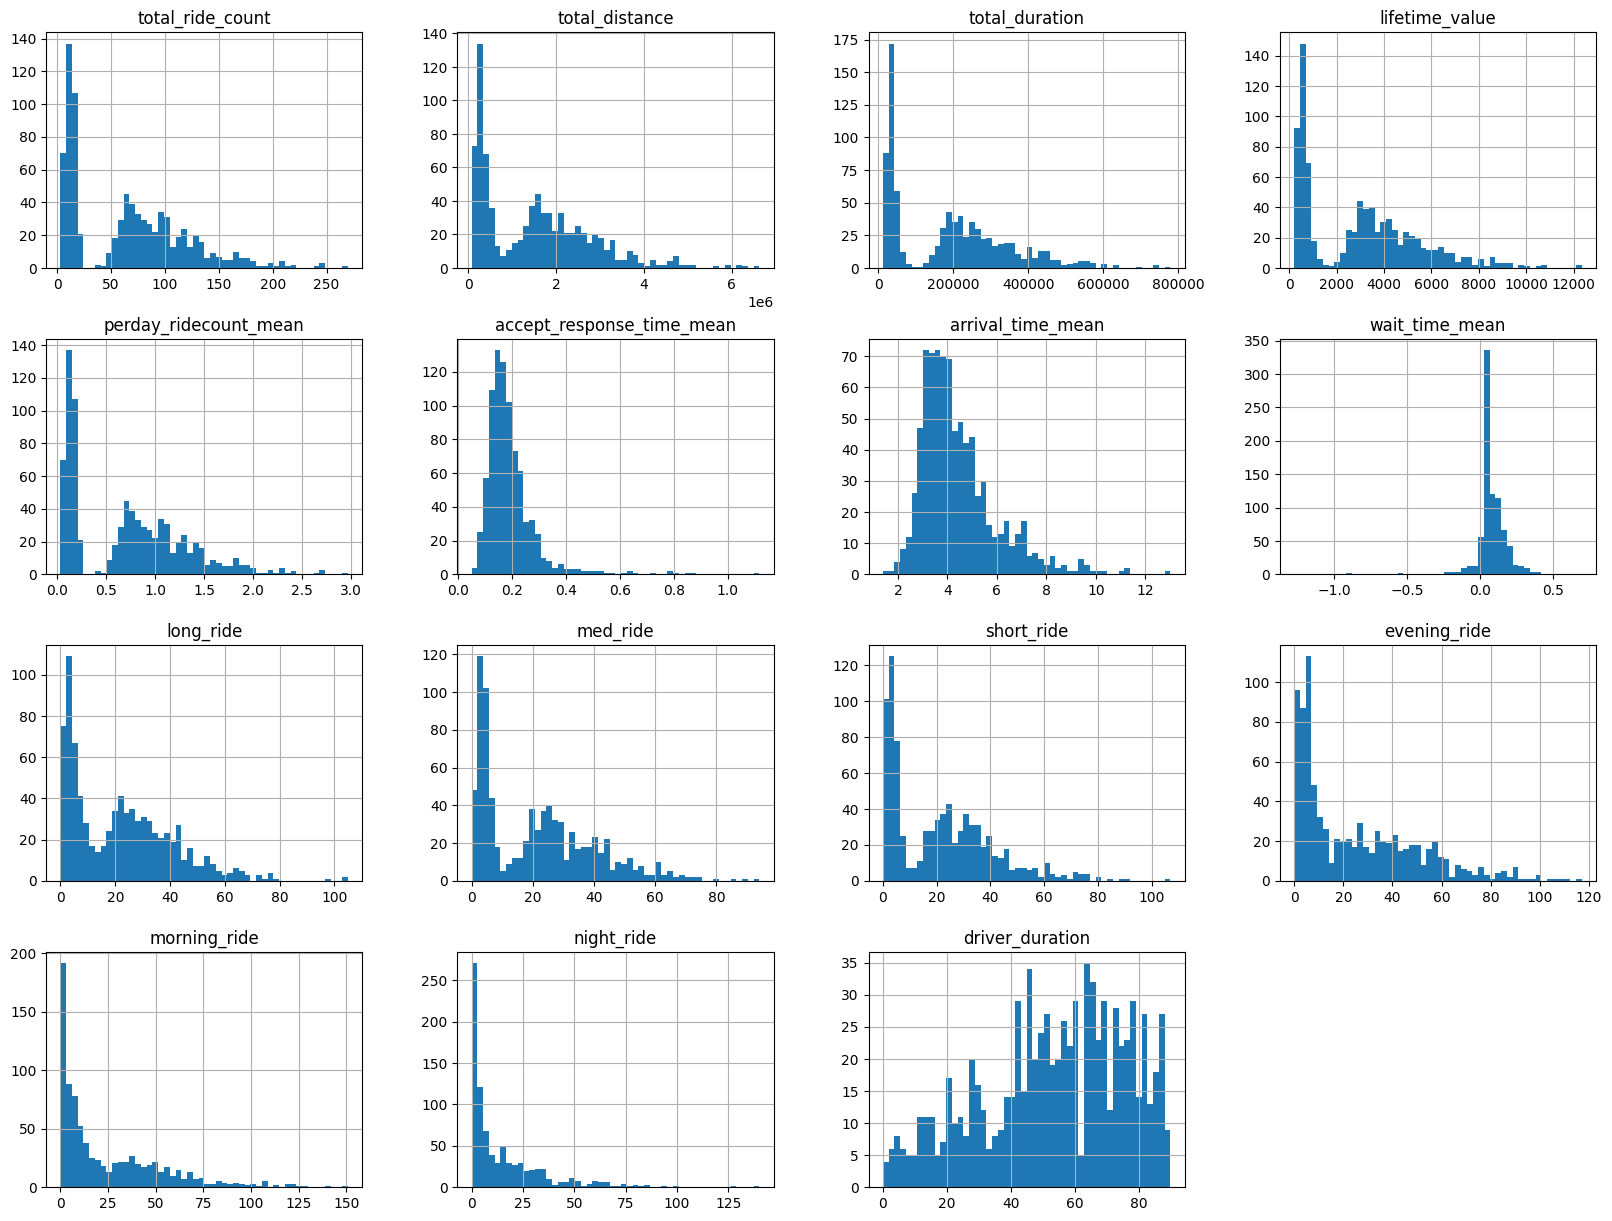

In [ ]:
# Plot Histgrams of data
driver_info.hist(bins=50, figsize=(20,15))
plt.show()


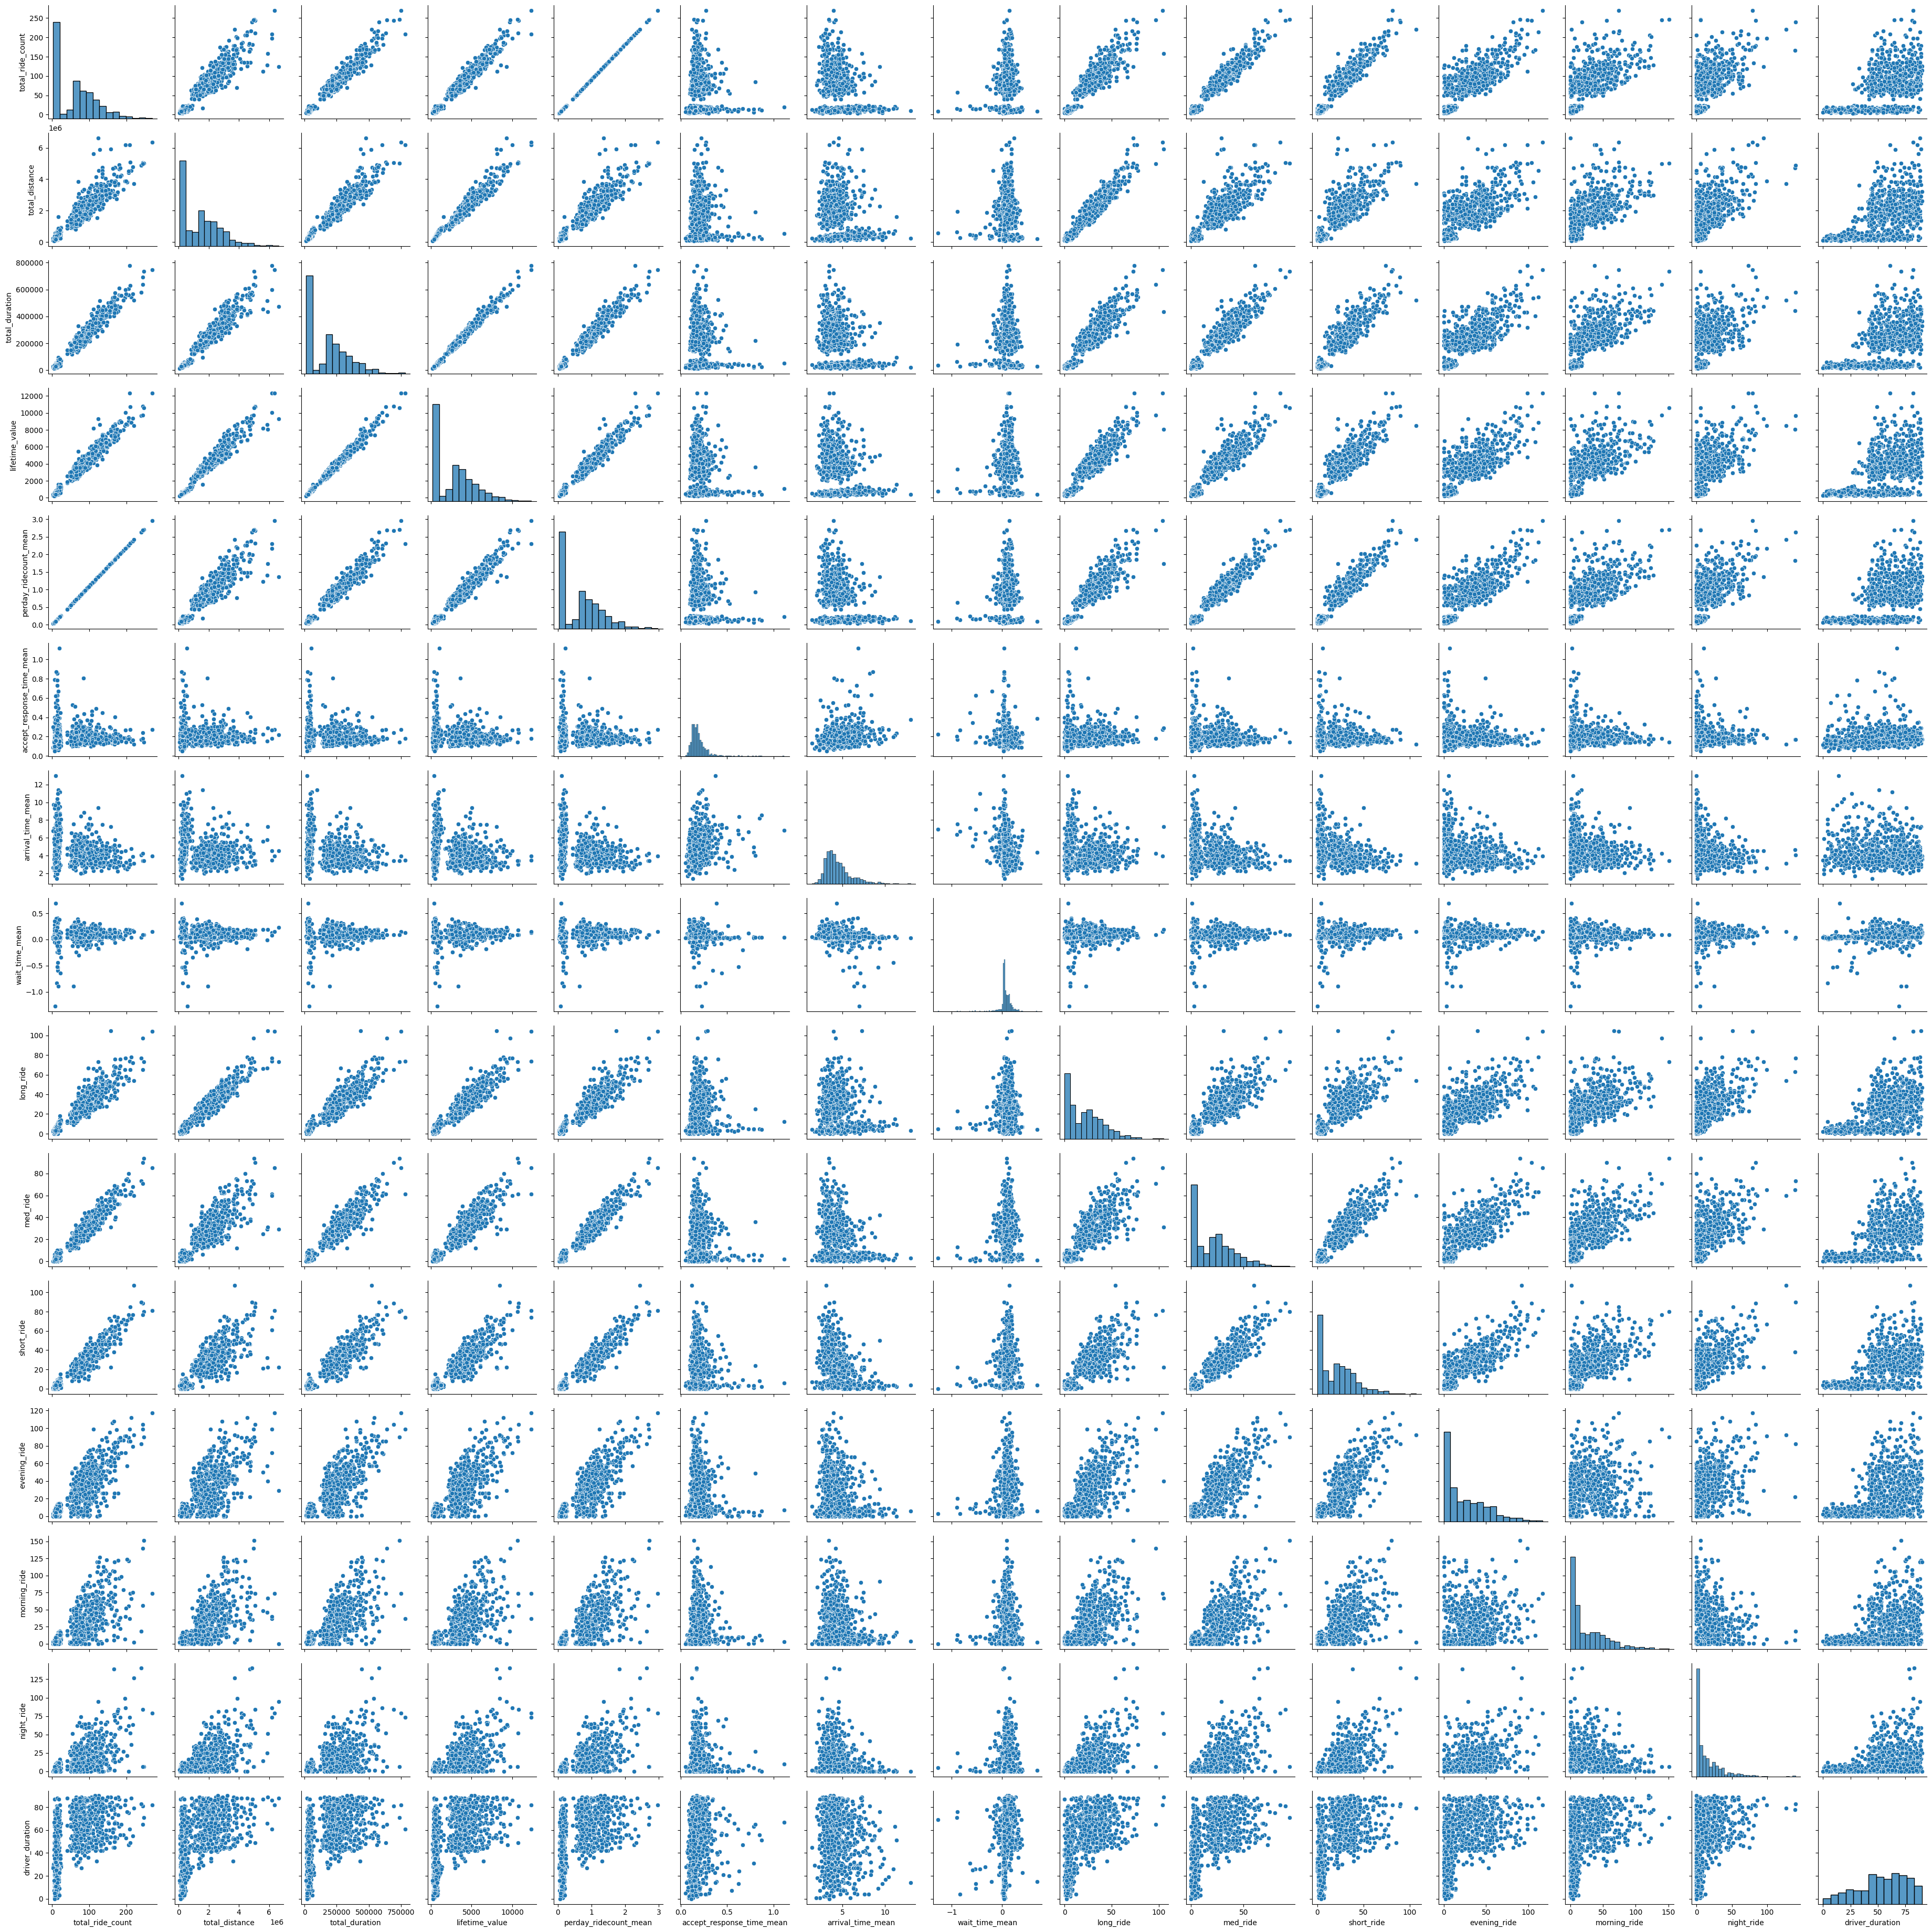

In [ ]:
# scatter plots of data
sns.pairplot(driver_info)


**Main Factors Affecting a Driver's Lifetime Value**

<ipython-input-25-5fdb122f0d83>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(driver_info.corr())


<Axes: >

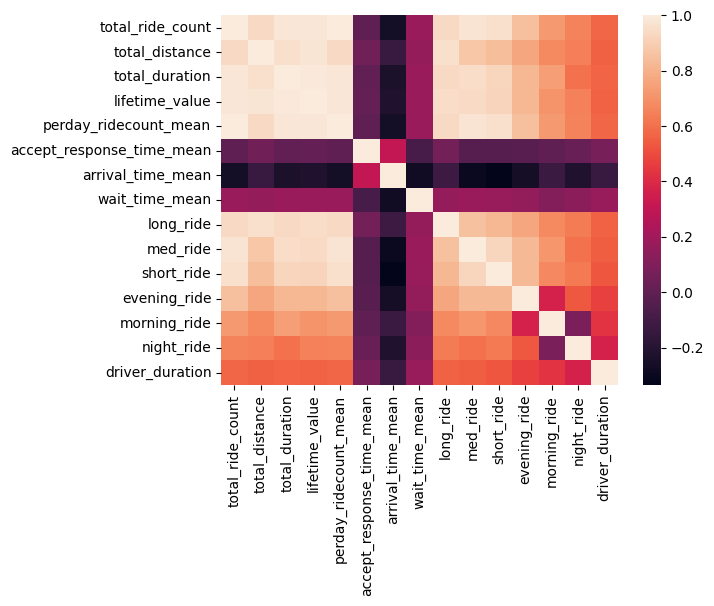

In [ ]:

# plot a heatmap of correlations betweem features
sns.heatmap(driver_info.corr())

In [ ]:
# get a correlation with lifetime_value as a DataFrame sorted in descending order
pd.DataFrame(driver_info.corr()['lifetime_value']).sort_values(by= 'lifetime_value' , ascending=False).iloc[1:]

<ipython-input-26-fc94d68e8f93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(driver_info.corr()['lifetime_value']).sort_values(by= 'lifetime_value' , ascending=False).iloc[1:]


lifetime_value
total_duration                   0.994173
perday_ridecount_mean            0.979906
total_ride_count                 0.979906
total_distance                   0.978378
long_ride                        0.948674
med_ride                         0.938419
short_ride                       0.916569
evening_ride                     0.819046
morning_ride                     0.704826
night_ride                       0.647837
driver_duration                  0.561485
wait_time_mean                   0.176464
accept_response_time_mean        0.013689
arrival_time_mean               -0.225439

**Average Projected Lifetime of a Driver**

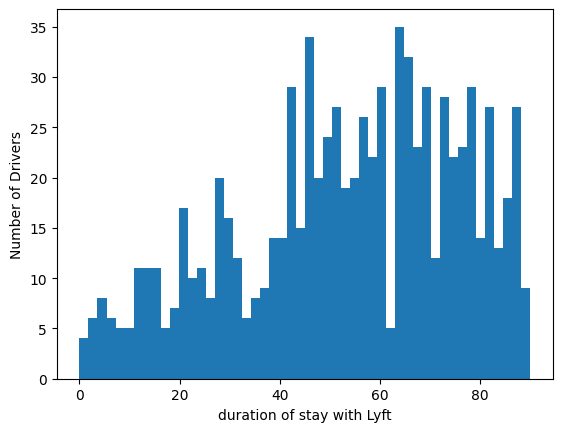

In [ ]:
driver_info['driver_duration'].plot.hist(bins=50)
plt.xlabel('duration of stay with Lyft')
plt.ylabel('Number of Drivers')
plt.show()

In [ ]:
driver_info['driver_duration'].describe()


count    835.000000
mean      53.462275
std       22.463922
min        0.000000
25%       39.000000
50%       56.000000
75%       72.000000
max       90.000000
Name: driver_duration, dtype: float64

**Do All Drivers Act Alike? - Clustering Exercise**

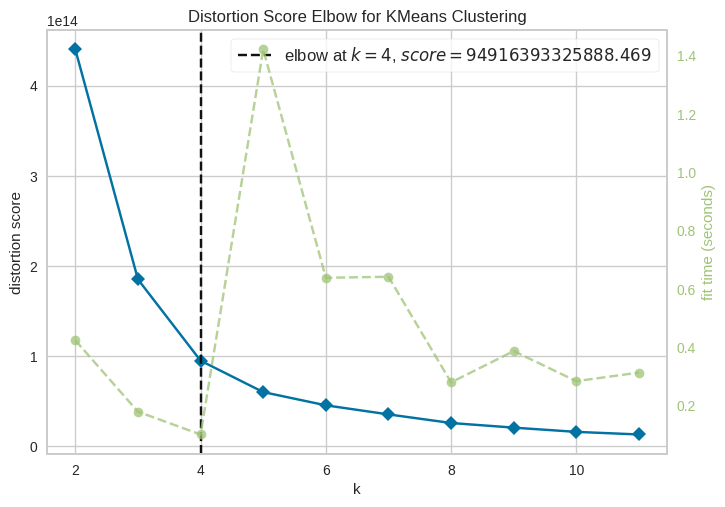

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Use the KElbowVisualizer to determine the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(driver_info.drop(['driver_id'], axis=1))
visualizer.show()


In [ ]:
# Fit a K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(driver_info.drop(['driver_id'], axis=1))

KMeans(n_clusters=4, random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**

**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

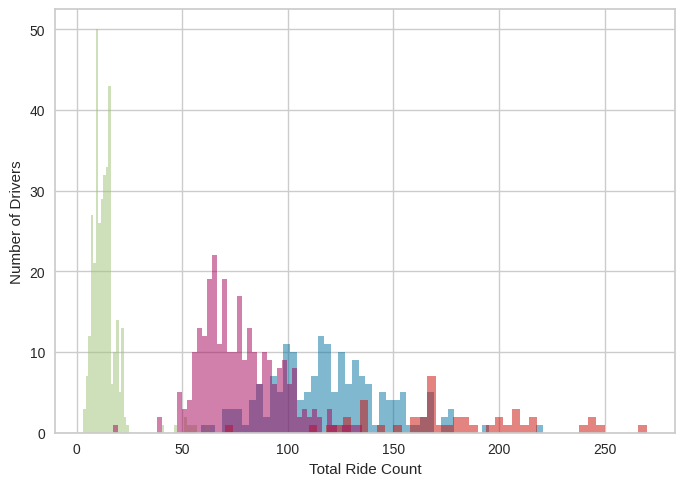

In [ ]:
# Add the cluster labels to the dataframe
driver_info['cluster'] = kmeans.labels_

# Plot the distribution of total ride count by cluster
driver_info.groupby('cluster')['total_ride_count'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Ride Count')
plt.ylabel('Number of Drivers')
plt.show()

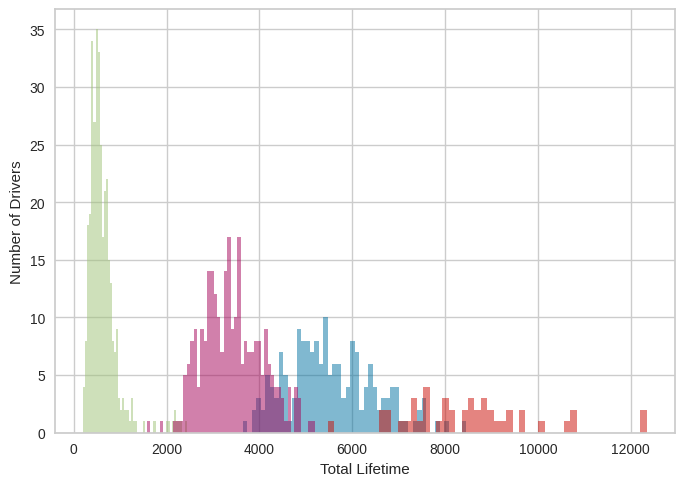

In [ ]:
# Plot the distribution of total earnings by cluster
driver_info.groupby('cluster')['lifetime_value'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Lifetime')
plt.ylabel('Number of Drivers')
plt.show()

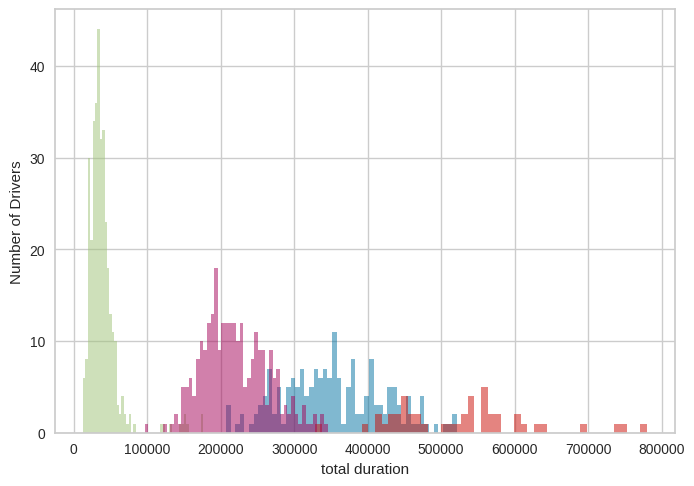

In [ ]:
# Plot the distribution of total duration by cluster
driver_info.groupby('cluster')['total_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()


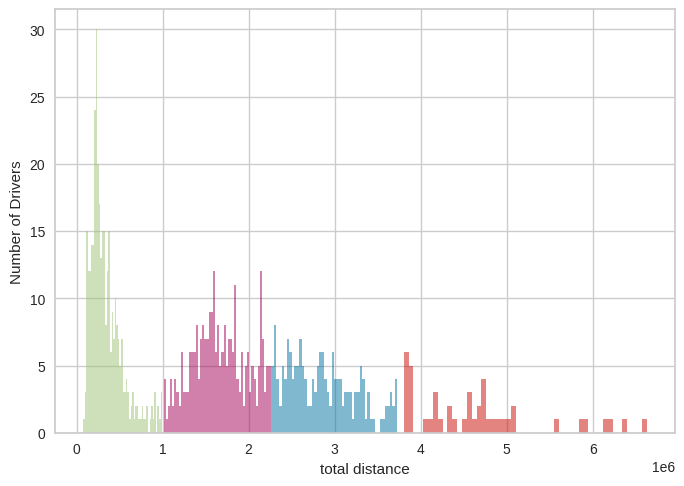

In [ ]:
# Plot the distribution of total distance by cluster
driver_info.groupby('cluster')['total_distance'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total distance')
plt.ylabel('Number of Drivers')
plt.show()

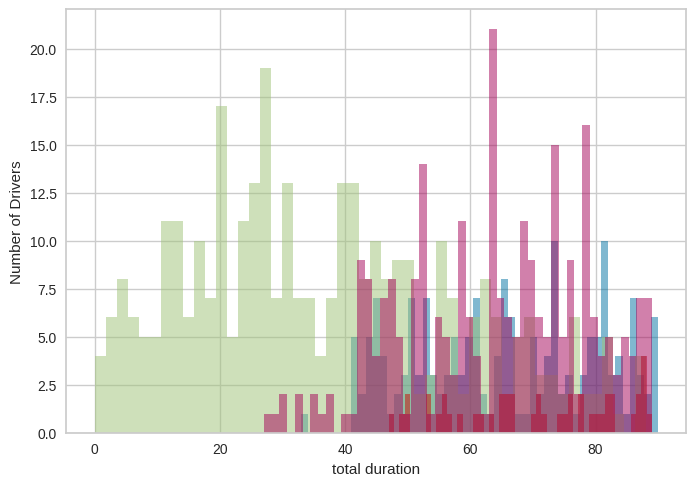

In [ ]:
# Plot the distribution of driver's lifetime by cluster
driver_info.groupby('cluster')['driver_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()


In [ ]:
grouped_df = driver_info.groupby('cluster')['lifetime_value','med_ride', 'perday_ridecount_mean', 'total_ride_count', 'short_ride',
       'total_duration', 'total_distance', 'long_ride', 'evening_ride',
       'night_ride', 'morning_ride', 'driver_duration', 'wait_time_mean'].agg('mean')


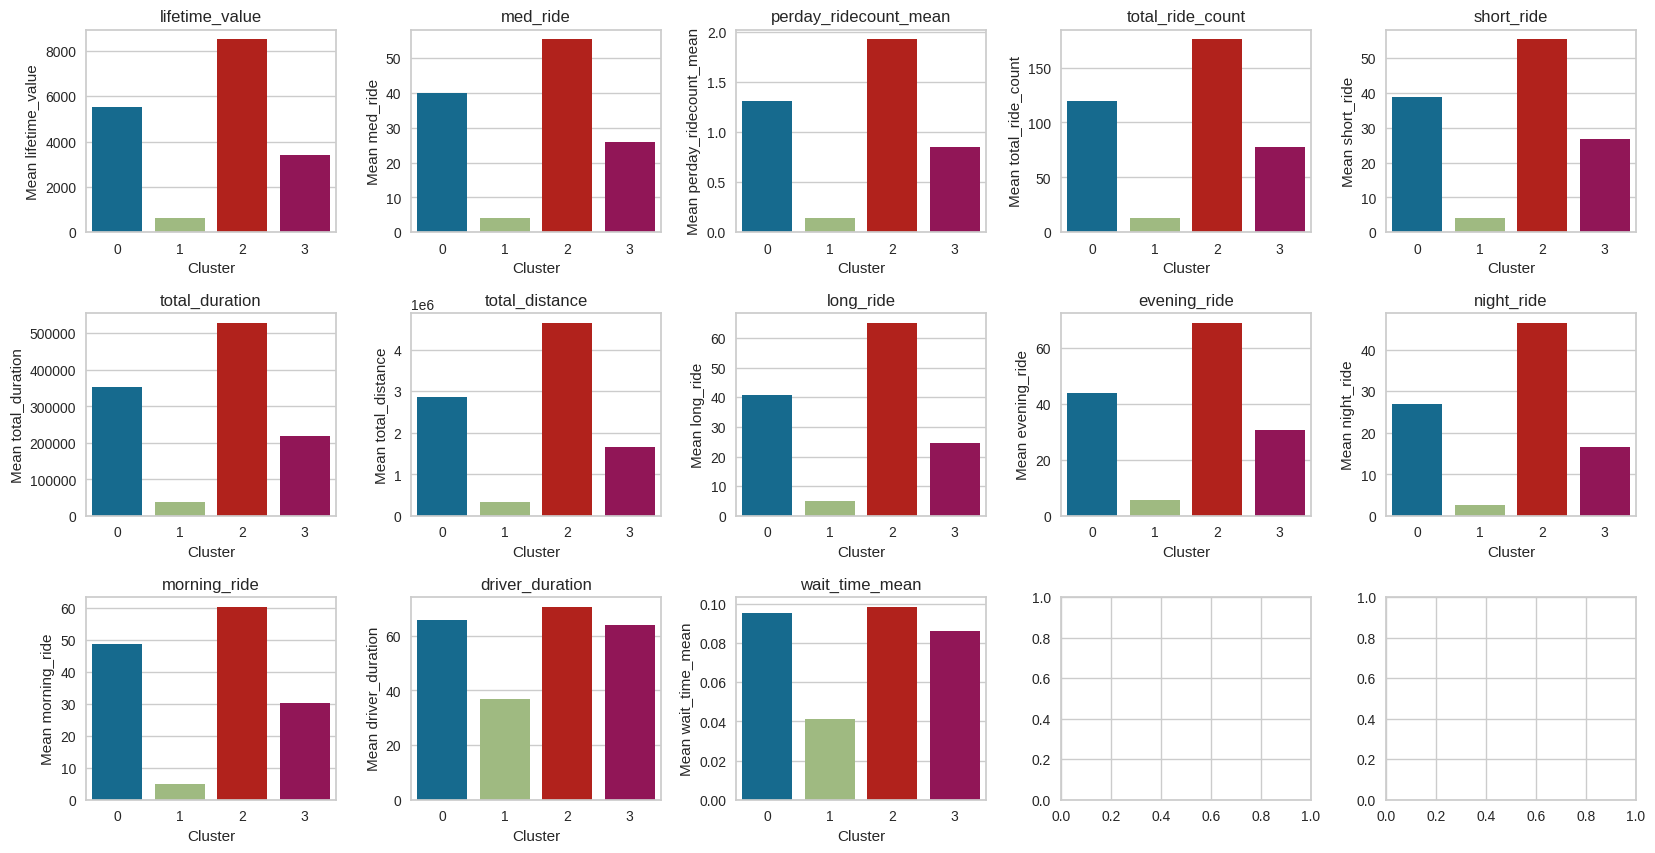

In [ ]:
# create subplots for each column in the grouped dataframe
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# loop through each column in the grouped dataframe and plot it in a subplot
for i, column in enumerate(grouped_df.columns):
    sns.barplot(x=grouped_df.index, y=grouped_df[column], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(column)
    axes[i//5, i%5].set_xlabel('Cluster')
    axes[i//5, i%5].set_ylabel('Mean ' + column)

plt.show()


After seeing these plots we can define clusters as bad drivers, fair drivers, good drivers, and excellent drivers:

Cluster 0 is **Bad drivers**: This cluster has drivers with relatively low total lifetime value, low total ride count, and low total duration and distance. They may have issues with customer service, low demand for their services, or low fares.

Cluster 2 is **Fair drivers**: This cluster has drivers with moderate total lifetime value, ride count, duration, and distance. They may not have a high demand for their services, but they also do not have any major issues that impact their earnings.

Cluster 1 is **Good drivers**: This cluster has drivers with higher total lifetime value, higher ride count, and higher total duration and distance than the first two clusters. They may have a consistent demand for their services and a good reputation, leading to higher earnings.

Cluster 3 is **Excellent drivers**: This cluster has drivers with the highest total lifetime value, ride count, and total duration and distance. These drivers are likely the most in demand and have a good reputation for providing excellent service to their customers, leading to high earnings.

**Actionable Recommendations**

Here are a few actionable recommendations based on the clustering analysis performed on the driver information data:

**Focus on retaining good and excellent drivers**: The business should focus on retaining the drivers who belong to the good and excellent clusters as they bring in more revenue and have more frequent rides compared to other drivers.

**Target improvement of fair drivers**: The business should target to improve the performance of fair drivers, to convert them into good or excellent drivers.

**Identify and address issues faced by bad drivers**: The business should identify and address the issues faced by the bad drivers, such as low earnings, low ride frequency, and low ride duration, to improve their performance.

**Personalized incentives and training**: The business can offer personalized incentives and training to drivers based on their performance clusters to further improve their performance.

**Use clustering results for dynamic pricing**: The clustering results can be used for dynamic pricing, where prices can be adjusted based on the supply and demand of drivers in a particular area.

**Monitor performance regularly**: The business should regularly monitor the performance of drivers and reassess them based on the clustering results to ensure that they are being properly targeted with the appropriate incentives and support.